# Customer Response Predict & Personality Analysis


## Dataset Description

First give a brief introduction to all attributes in the dataset we use:

* People 
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if customer complained in the last 2 years, 0 otherwise

* Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years

* Promotion
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place
    - NumWebPurchases: Number of purchases made through the company’s web site
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s web site in the last month


## Tasks Description

This dataset gives **2240** different customers basic information, their product purchasing preferences as well as their reactions to some marketing compaigns. I want to perform 2 tasks on this dataset:

1) **Supervised Learning Task - Predict Response:** As the data description says, the column 'Response' stands for if certian customer accepted the offer in the last campaign. So the question is **whether we can use some customers' responses to this compaign to predict someone else's reactions** ? If we can achieve this, a business could promote the compaign to customers that are more likely to accept the offer, which could help it make more efficient marketing plan.   

2) **Unsupervised Learning Task - Customer Personality Segmentation:** This dataset also gives us some information about customers(Including their basic information and purchasing preference). So we could perform **Customer Personality Analysis** to help find a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to make proper market plans, like modifying and promoting products for different customers according to the specific needs, behaviors and concerns.


But before doing the tasks above, some **data preprocessing** work need to be done. Also, we need to do some **exporatory data analysis(EDA)** to help people better understand the dataset. 

## Notebook Content 

### 1. [Data Preprocessing](#DP)

### 2. Exploratory Data Analysis
* **2.1 [Univariate Analysis](#UA)**
* **2.2 [Bivriate Analysis](#BA)**
* **2.3 [Multivriate Analysis](#MA)**

### 3. Feature Selection & Dimension Reduction
* **3.1 [Feature Selection by Random Forest](#FS)**


In [1]:
import warnings
warnings.filterwarnings('ignore')
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import seaborn as sns
import scipy
import random
import math
from scipy.stats.mstats import winsorize
from tqdm import tqdm

from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline


In [2]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### First Observation:
* There are 3 'object type' variables - ['Education', 'Marital_Status', 'Dt_Customer'], and the rest are all numerical Vs**


## Data Preprocess<a name='DP'></a>

In [4]:
# Check NUll data
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**There are 24 NA rows in 'Income' columns, so we fill these NA with the average income of all people**

In [5]:
data['Income'].fillna(np.mean(data['Income']), inplace=True)
# Change unit to 1K $ 
data['Income'] = data['Income'] / 1000 

In [6]:
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp2,2
Complain,2
AcceptedCmp1,2
AcceptedCmp5,2
Kidhome,3


### Observations:
* Z_Revenue & Z_CostContact have **Constant** value, which don't provide any information so we should drop them.
* Response - AcceptedCmp5 are all **Binary Variables**.
* Marital_Status & Education can be seen as **Categorical Variable**.

* Kidhome & Teenhome are **Discrete Ordinal Variables**, for which have clear orders but not many different values.
* The rest 16 variables can be seen as **Continuous Ordinal Variables**.

In [7]:
# Drop constant columns - Z_CostContact & Z_Revenue
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True) 
# User ID & Regist Date is useless for classification & Segmentation task
data.drop(['ID', 'Dt_Customer'], axis=1, inplace=True) 

In [8]:
# Change Year_Birth to Age (Age is more informative)
data['Age'] = 2021 - data.Year_Birth.to_numpy()
data.drop('Year_Birth', axis=1, inplace=True)

In [9]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

* There are too many maritial status, which might affects the efficiency of classification algorithms.
* Alone, Adsurd and YOLO are all specific situations of 'Single', so replace all of them with 'Single'

In [10]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

In [11]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

* There 5 different values of Education, but according to 'Three Cycle System' from the European Higher Education Area, **2n Cycle** is equal to **Master degree**.
* **Graduation** degree is the same as **Bachelor** in Europe. Thus, we adjust the education level of all customers.

In [12]:
data['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

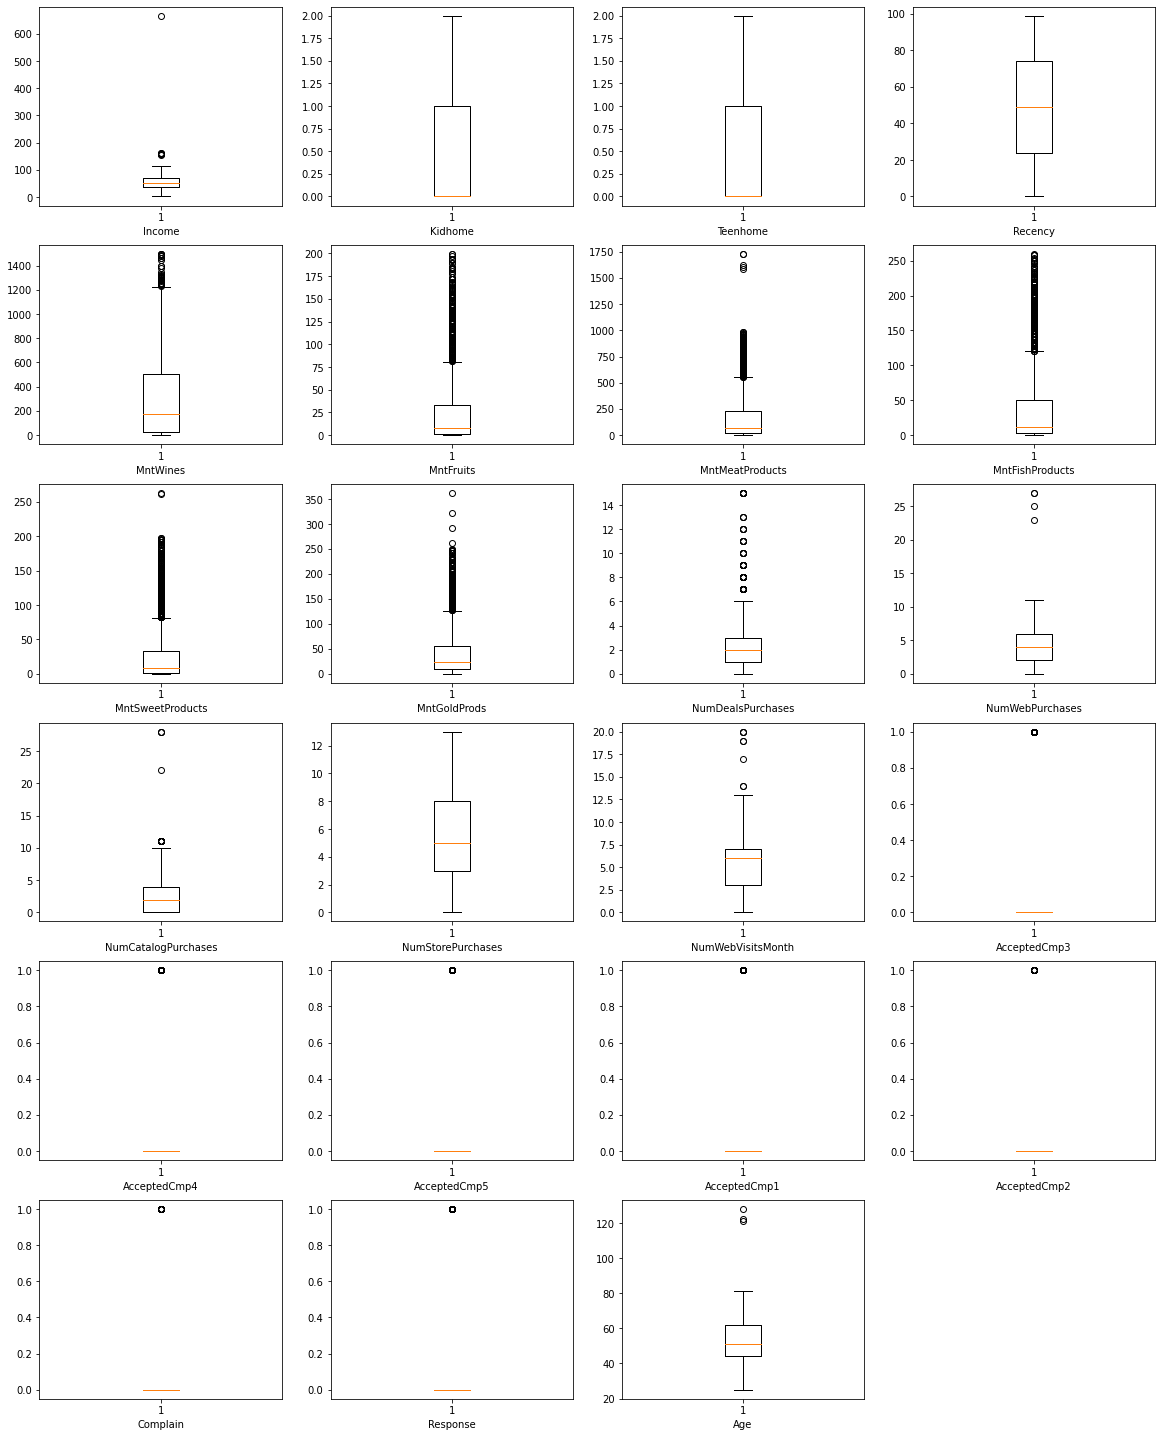

In [13]:
# plot all numerical columns (14)
num_coln = data.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(data[i])
    j=j+1
    plt.xlabel(i)
    # plt.legend(i)
plt.show()


* We can see some clear outliers in **Income** and **Age**. We will remove the rows where the Income is greater than 200K and birth year is less than 1920.


* For other columns, we cannot blindly remove these outliers as there could be cases where the requirement for these products is high by the user. Maybe the consumer is hosting a party or an event or is more comfortable getting his products from a particular channel.


In [14]:
data.drop(data[(data['Income']>200)|(data['Age']>100)].index,inplace=True)

## Exploratory Data Analysis

* Univariate Analysis
* Bivriate Analysis
    * 2 categorical variables
    * 1 categorical V + 1 numerical V
* Multivriate Analysis (Relationships between 2 numerical Vs)

### Univariate Analysis<a name='UA'></a>

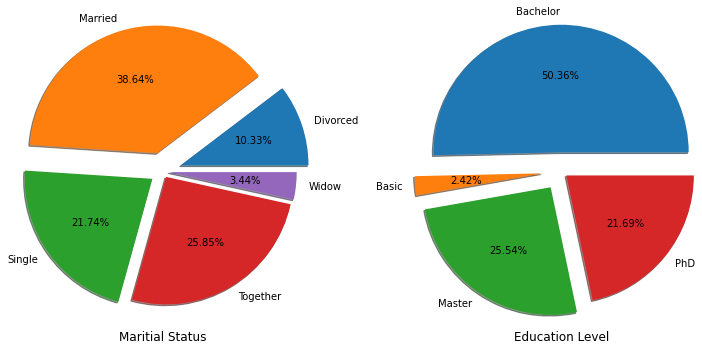

In [15]:
# Maritial Status & Education levels
cust_count=data.groupby("Marital_Status").count()['Age']
label=data.groupby('Marital_Status').count()['Age'].index
fig, ax = plt.subplots(1, 2, figsize = (10, 12))
ax[0].pie(cust_count, labels=label, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.3,0.3,0.2,0.1,0.1])
ax[0].set_title('Maritial Status', y=-0.6)

cust_count = data.groupby("Education").count()['Age']
label = data.groupby('Education').count()['Age'].index
ax[1].pie(cust_count, labels=label, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.3,0.3,0.3,0.1])
ax[1].set_title('Education Level', y=-0.6)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()

* These 2 figures give a quick look of the customer distribution, we could see the most our customer(64%) are in relationships(Married or Together) and most(97%) are at least bachelor degrees.

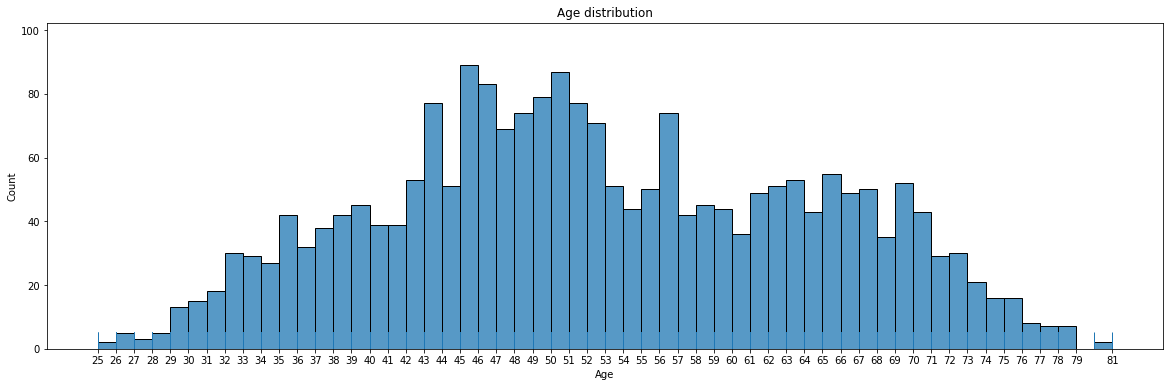

In [16]:
# Age Range
plt.figure(figsize=(20, 6))
plt.title('Age distribution')
ax = sns.histplot(data['Age'].sort_values(), bins=56)
sns.rugplot(data=data['Age'], height=.05)
plt.xticks(np.linspace(data['Age'].min(), data['Age'].max(), 56, dtype=int, endpoint = True))
plt.show()

* The age of the customers are mainly clustering in **40s or 60s**, the young people(under 30) are very few. 

* These people are at their middle ages or old ages, so their family condition should be further taken care of.

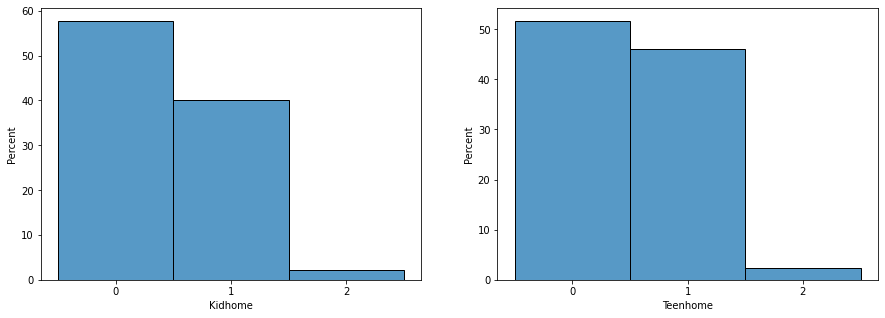

In [17]:
# Kid Home & Teen Home
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data, x='Kidhome', stat="percent", discrete=True)
plt.xticks([0, 1, 2])

plt.subplot(122)
sns.histplot(data=data, x='Teenhome', stat="percent",discrete=True)
plt.xticks([0, 1, 2])
plt.show()

* Most customers have 1 kid or 0 kid at home, very few have 2 kids, and no one have kids over 2.

* The number of teens at home is very similar to kid num. 

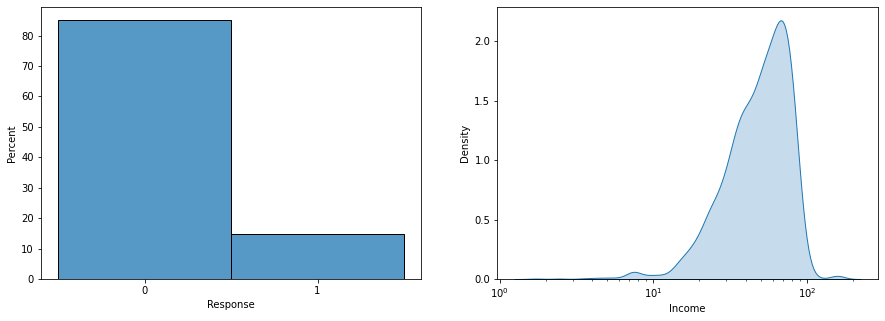

In [18]:
# Response dist. & Imcome Range
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(data=data, x='Response', stat="percent", discrete=True)
plt.xticks([0, 1])

plt.subplot(122)
# Income Range
sns.kdeplot(data=data, x="Income", shade=True, log_scale=True)
plt.show()

* According to Response, this is an **unbalanced dataset**, over 80% customers say no to the last compaign. So we should take care and use more comprehensive and accurate indicators(like F-1 or MCC) to evaluate the classification models.

* Most customers income levels are in the range [10K, 100K] per year.

### Bivriate Analysis<a name='BA'></a>

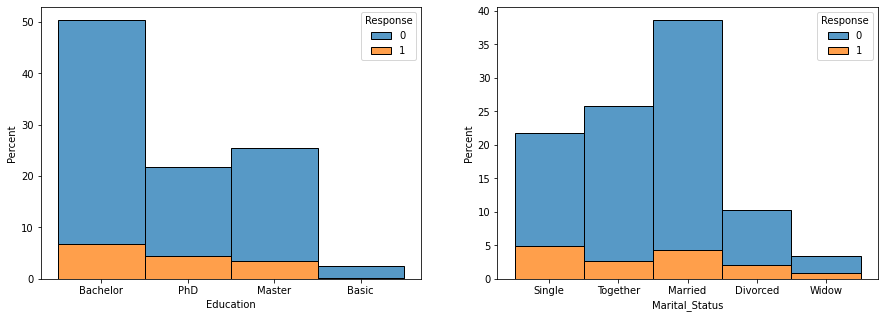

In [19]:
# Education & Response
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data, x="Education", hue="Response", multiple="stack", stat="percent")

# Marital_Status & Response
plt.subplot(122)
sns.histplot(data=data, x="Marital_Status", hue="Response",stat="percent", multiple="stack")
plt.show()

* From the left figure, we can find that the **compaign acceptance rate** in high education groups(Master and PhD) are higher than that in low education groups.

* From the right plot, we find that the **single people** tend to say yes to this compaign. 

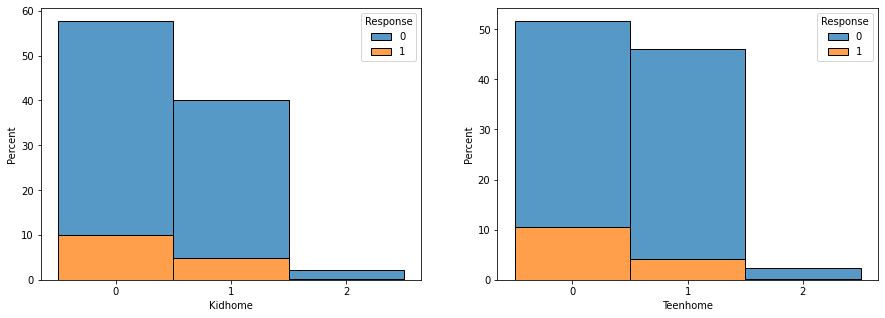

In [20]:
# Kid Home & Response
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=data, x="Kidhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])
# Teen Home & Response
plt.subplot(122)
sns.histplot(data=data, x="Teenhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])
plt.show()

* It seems that customers with no kids and no teens at home are more likely to accept the offer in this compaign.

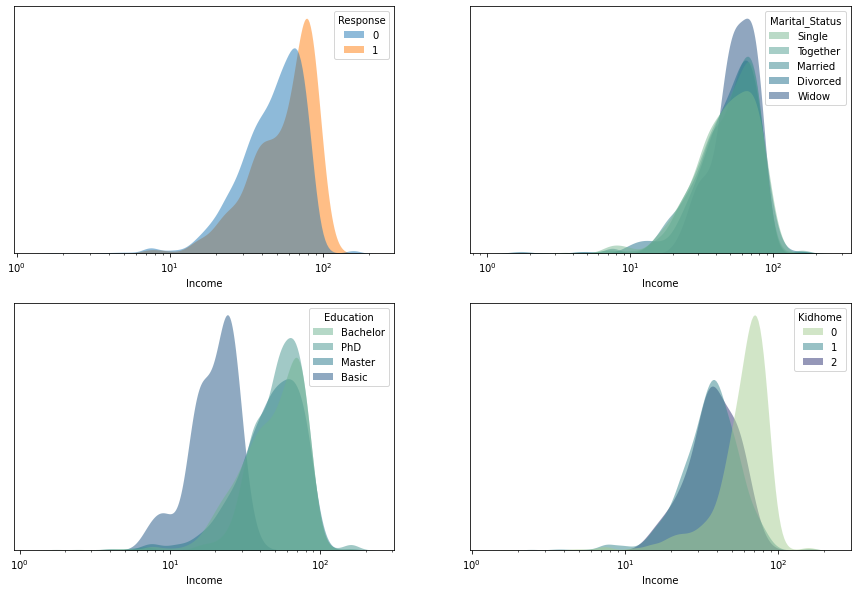

In [21]:
# Income (by Response/Marital_Status/Education/Kidhome)
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.kdeplot(
   data=data, x="Income", hue="Response", log_scale= True,
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

# segment by Marital_Status
plt.subplot(222)
sns.kdeplot(
   data=data, x="Income", hue="Marital_Status", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

# segment by Education
plt.subplot(223)
sns.kdeplot(
   data=data, x="Income", hue="Education", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

# segment by Kidhome
plt.subplot(224)
sns.kdeplot(
   data=data, x="Income", hue="Kidhome", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)

#### The plots about Income VS 4  different Discrete Variables give us some interesting information.
     1) The high income groups have larger possibility to accept offer in the compaign, as we can see the income distributions of people who say 'yes' and 'no' have a slight difference.
     2) There are no clear income difference between people with different maritial status.
     3) Customers only with basic education have significantly lower income, while bachelors, masters, and PhDs do not have clear difference in income level. 
     4) It seems that customers who don't have any kids at home have higher income levels.

### Multivariate Analysis<a name='MA'></a>

In [22]:
# Check all Vriable Type
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
Complain,2
AcceptedCmp2,2
AcceptedCmp1,2
AcceptedCmp5,2
AcceptedCmp4,2
AcceptedCmp3,2
Response,2
Kidhome,3
Teenhome,3
Education,4


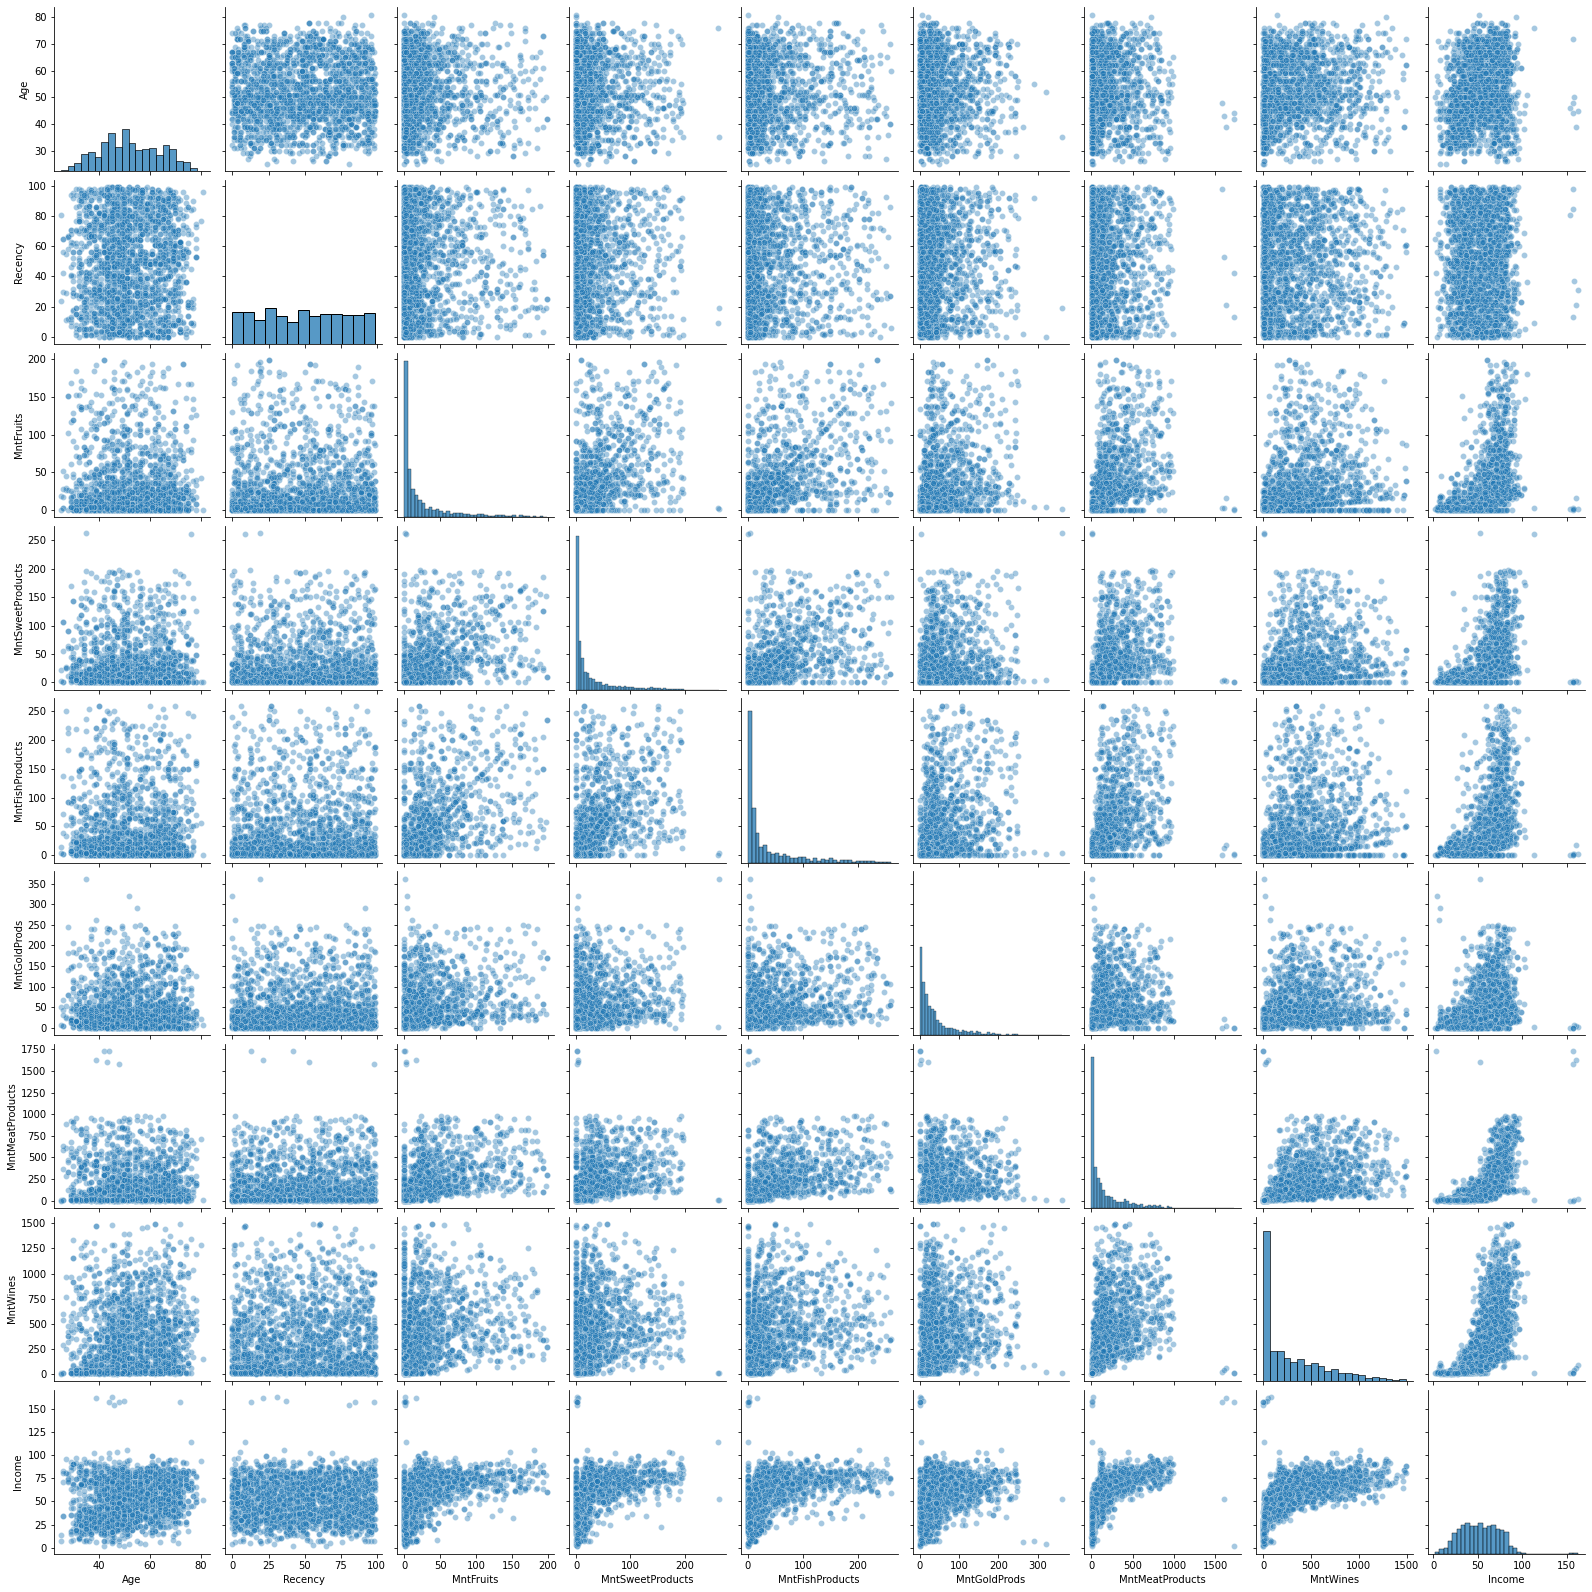

In [23]:
# Choose features have over 50 different values
NUMERICAL_FEATURES = ['Age', 'Recency', 'MntFruits', 
                      'MntSweetProducts', 'MntFishProducts', 'MntGoldProds', 
                      'MntMeatProducts', 'MntWines', 'Income']

sns.pairplot(data=data[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.4})
plt.show()

* From the plot above, we could see tha these numerical variables do not have clear linear trend between each other.
* While **Income** might have **log relationships** with these product purchasing amount (say, Mntfruit, MntSweetProducts and etc.).

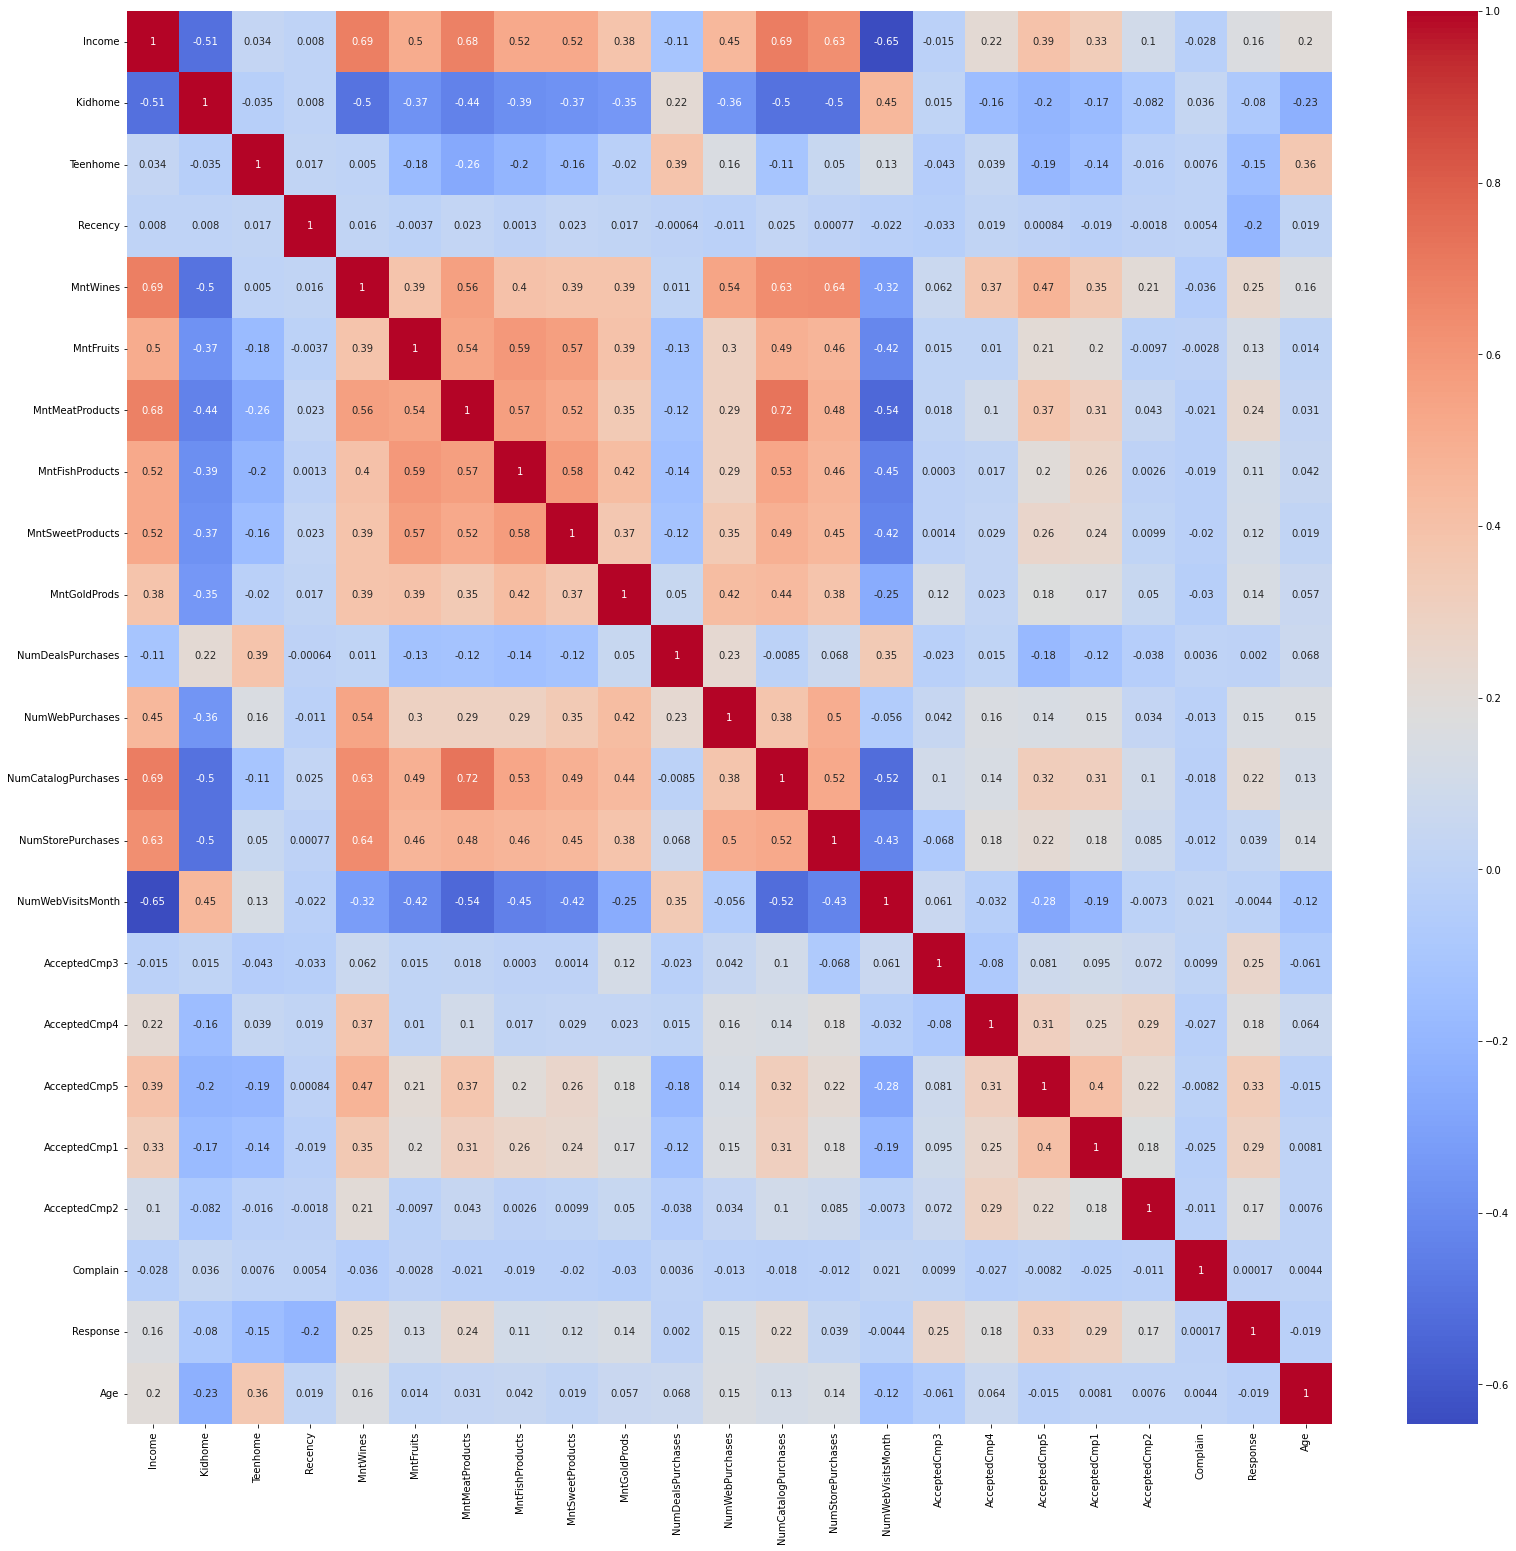

In [24]:
# Heat map among all numerical variables
cor = data.corr()
plt.figure(figsize = (27,26))
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()

## Preparations for Prediction Models

In [25]:
# Education have orders, so we change Basic-Phd to scale 0-3
df_cluster = data.copy() # leave for clustering 

data['Education'] = data['Education'].replace(['Basic'], 0)
data['Education'] = data['Education'].replace(['Bachelor'], 1)
data['Education'] = data['Education'].replace(['Master'], 2)
data['Education'] = data['Education'].replace(['PhD'], 3)

# Change Marital_Status to dummies
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2236 non-null   int64  
 1   Income                   2236 non-null   float64
 2   Kidhome                  2236 non-null   int64  
 3   Teenhome                 2236 non-null   int64  
 4   Recency                  2236 non-null   int64  
 5   MntWines                 2236 non-null   int64  
 6   MntFruits                2236 non-null   int64  
 7   MntMeatProducts          2236 non-null   int64  
 8   MntFishProducts          2236 non-null   int64  
 9   MntSweetProducts         2236 non-null   int64  
 10  MntGoldProds             2236 non-null   int64  
 11  NumDealsPurchases        2236 non-null   int64  
 12  NumWebPurchases          2236 non-null   int64  
 13  NumCatalogPurchases      2236 non-null   int64  
 14  NumStorePurchases       

## Feature Selection by Random Forest <a name='FS'></a>

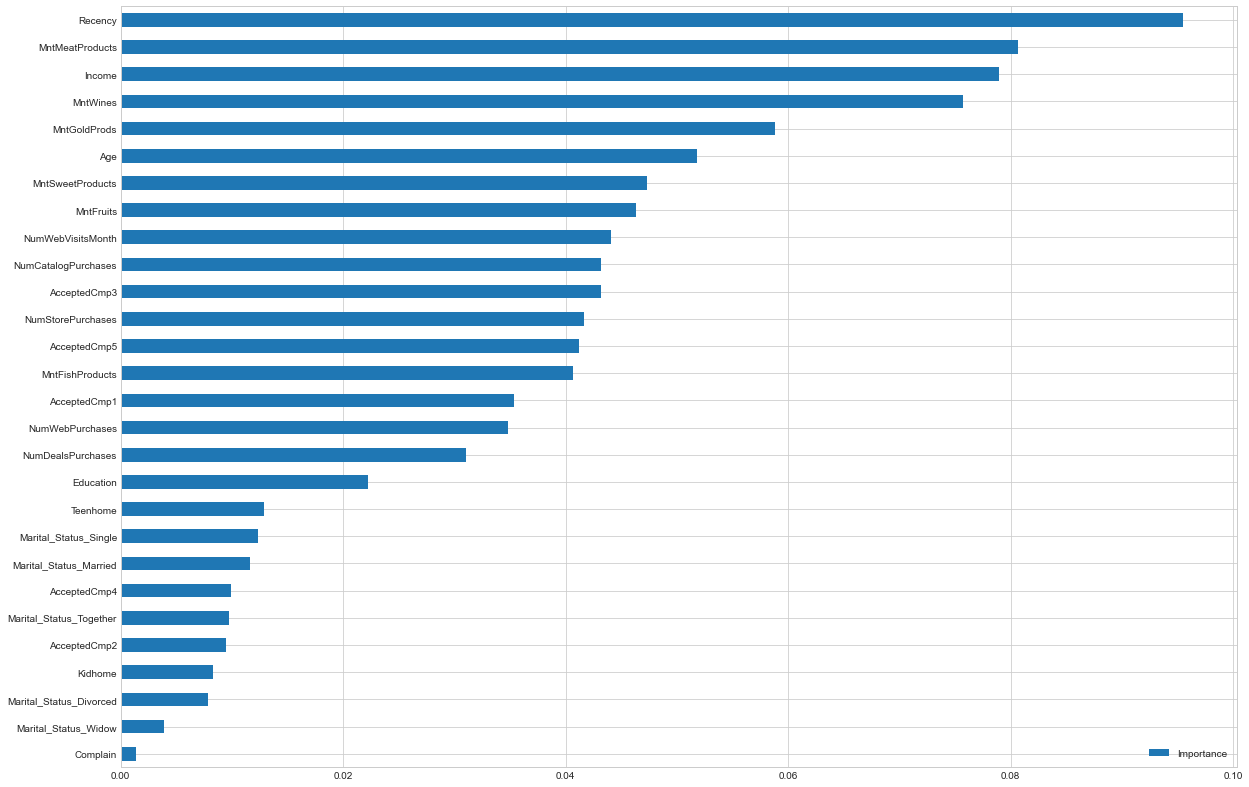

In [26]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(data.drop('Response', axis=1), data['Response'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=data.drop('Response', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [27]:
# Choose Features (Keep 90% Importance ration)
feature_nums = 18
ascend_import = importance.sort_values(by='Importance', ascending=False)
all_info = ascend_import['Importance'].iloc[:feature_nums].sum()
all_choose_features = list(ascend_import.iloc[:feature_nums].index)

print('Names: ', all_choose_features)
print('Importance Raio: ', all_info)

Names:  ['Recency', 'MntMeatProducts', 'Income', 'MntWines', 'MntGoldProds', 'Age', 'MntSweetProducts', 'MntFruits', 'NumWebVisitsMonth', 'NumCatalogPurchases', 'AcceptedCmp3', 'NumStorePurchases', 'AcceptedCmp5', 'MntFishProducts', 'AcceptedCmp1', 'NumWebPurchases', 'NumDealsPurchases', 'Education']
Importance Raio:  0.9125619986790302


## Choose Data Source

* 0: Raw data
* 1: Feature Selection


In [28]:
# Choose dataset
dataset_num = 1

# 0: Raw Data; 1: Feature Selection Data; 2: PCA Data
all_datasets = [data.drop('Response', axis=1).values, data[all_choose_features].values]

# Choose data
final_data = all_datasets[dataset_num]

### Data Preparation for Classification Models

In [29]:
# Split the dataset
from imblearn.over_sampling import SMOTE
from collections import  Counter

x_train = final_data[:2000]
y_train = data['Response'].values[:2000]
x_test = final_data[2000:]
y_test = data['Response'].values[2000:]

print('Train: ', len(x_train))
print('Test: ',  len(x_test))
print('N/P Sample: ', Counter(y_train))

# SMOTE Samples
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

print('Train: ', len(x_train))
print('Test: ',  len(x_test))
print('N/P Sample: ', Counter(y_train))

# MCC scorer function
mcc_scorer = make_scorer(matthews_corrcoef)

Train:  2000
Test:  236
N/P Sample:  Counter({0: 1698, 1: 302})
Train:  3396
Test:  236
N/P Sample:  Counter({1: 1698, 0: 1698})


#### Why SMOTE (Dataset Extended Trick) & MCC Scorer (Matthews correlation coefficient) ?

* As we find in the data exploration phase, this is an unbalanced dataset(over 80% say no to the compaign). So the models are easy to learn some traits about negative samples, but it might be hard to get from positive samples.


* While **SMOTE** alleviate the problem by offering us more positive training samples.


* At the same time, **MCC scorer** takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. In this learning task, MCC is a more efficient measure than accuracy in test period, because there are only a few positive samples in the test set.